In [1]:
import pandas as pd

C:\workspace\new\pd-explain\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\workspace\new\pd-explain\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\workspace\new\pd-explain\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pd_explain
pd_explain.__version__

usetex mode requires TeX.


usetex-False


'0.0.9'

In [3]:
df = pd.read_csv("../Datasets/houses.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


change to filter "on" attribute..

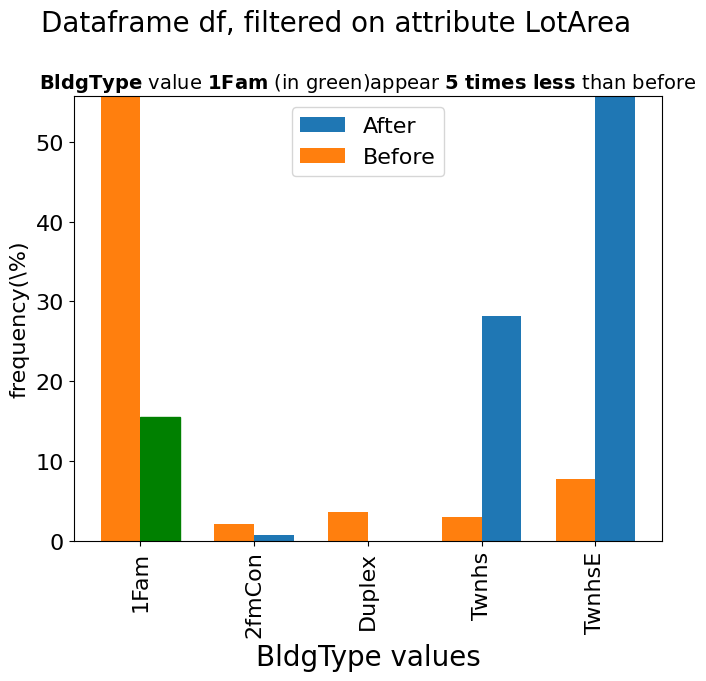

In [5]:
df[df.LotArea<5000].explain()

In [6]:
res = df.groupby('YrSold').SalePrice.mean()

In [7]:
res

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice_mean, dtype: float64

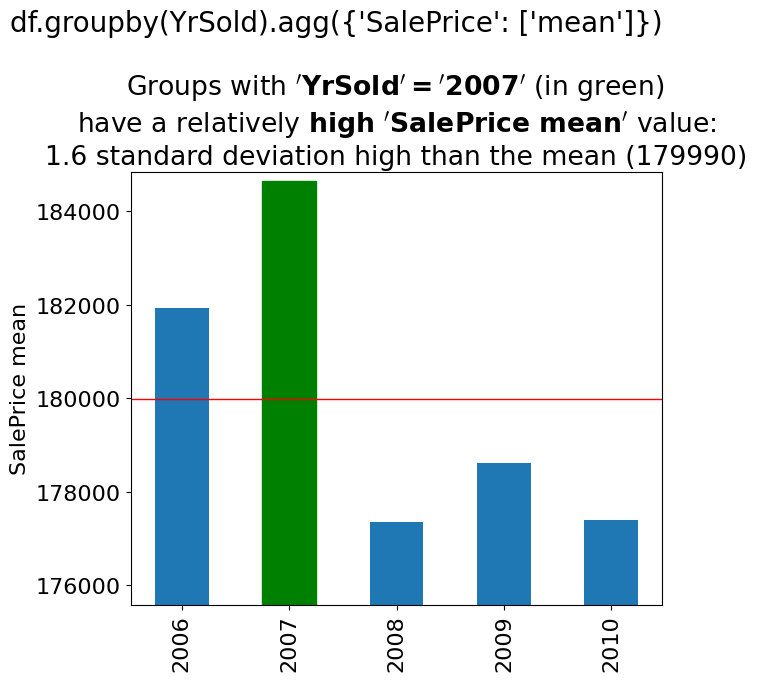

In [8]:
res.explain()

In [9]:
d2=df.groupby('LotShape').agg({'LotArea': 'mean','SalePrice':'max','OverallQual': 'median'})

In [10]:
d2

,LotArea,SalePrice,OverallQual
LotShape,,,
IR1,11894.545455,755000,6.0
IR2,23733.658537,538000,7.0
IR3,41338.200000,375000,7.0
Reg,8876.915676,582933,6.0


### COMMENT: See that when the bar is very low, we cannot see it is green. Can we do something like coloring a small bar?

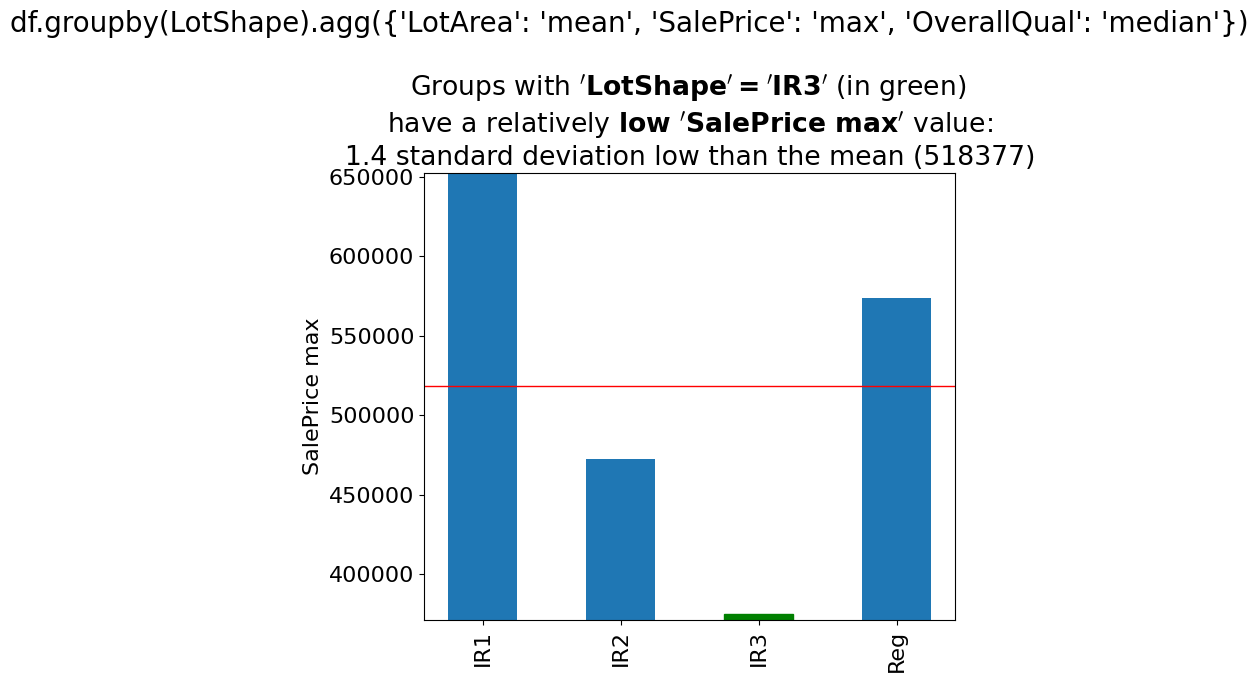

In [11]:
d2.explain()

fix warning?



In [12]:
gb2 = df.groupby('MSSubClass').agg(['mean','median','max','min'])

maybe the figures should not alwyas start from zero? lets talk about it, this is "nice ti have", not crucial

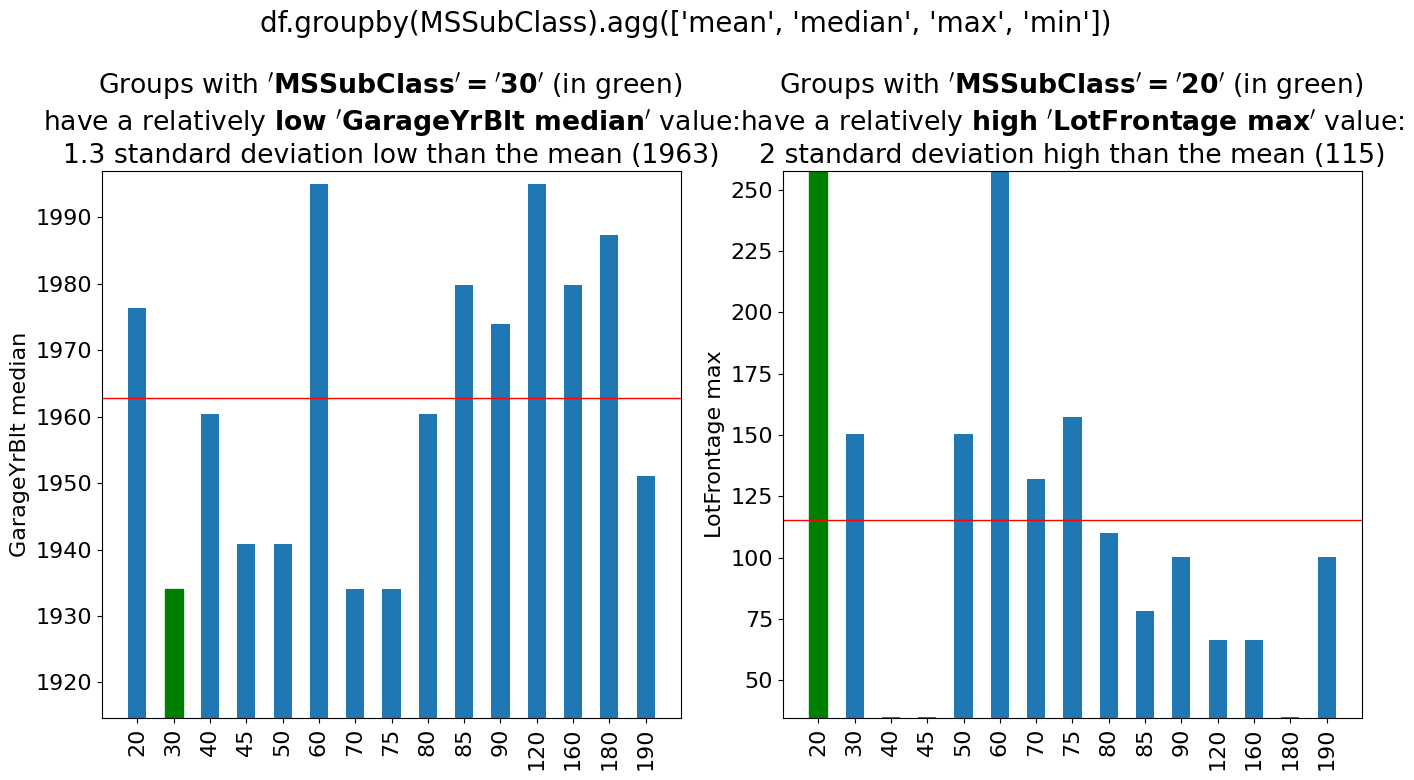

In [13]:
gb2.explain(top_k=3)

fix warning?

In [14]:
gb3 = df.groupby('MSSubClass').agg('mean')

### Comment: Figure (2) on the top row starts from negative values. Lets think how to fix##


In [15]:
gb3

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,,,,,,,,,,,,,,,,,,,,,
20,723.998134,77.464531,11755.509328,6.033582,5.550373,1977.960821,1985.878731,104.355263,562.986940,71.958955,...,98.014925,42.811567,12.345149,5.246269,15.632463,1.208955,53.514925,6.244403,2007.875000,185224.811567
30,747.826087,60.349206,7888.492754,4.507246,5.753623,1926.637681,1968.869565,12.130435,187.826087,17.333333,...,33.927536,27.101449,61.115942,0.000000,4.144928,0.000000,35.942029,5.898551,2007.768116,95829.724638
40,725.000000,50.000000,12559.750000,5.750000,6.500000,1946.000000,1973.250000,0.000000,500.750000,0.000000,...,67.000000,7.000000,45.750000,0.000000,0.000000,0.000000,150.000000,7.750000,2008.500000,156125.000000
45,422.000000,55.000000,6949.000000,5.500000,6.166667,1934.583333,1964.000000,0.000000,103.000000,0.000000,...,4.000000,9.333333,82.416667,0.000000,0.000000,0.000000,0.000000,6.333333,2007.416667,108591.666667
50,751.194444,64.000000,10479.145833,5.402778,6.013889,1935.833333,1969.854167,34.409722,226.666667,33.347222,...,65.861111,26.583333,50.319444,4.194444,21.673611,0.000000,59.375000,6.236111,2007.840278,143302.972222
60,708.882943,81.056522,12058.076923,7.060201,5.297659,1994.494983,1996.331104,181.148649,440.525084,27.879599,...,131.638796,80.488294,8.755853,3.394649,16.933110,5.197324,18.327759,6.478261,2007.729097,239948.501672
70,771.466667,65.654545,10120.166667,6.116667,6.633333,1918.833333,1977.866667,3.733333,182.000000,6.000000,...,55.233333,36.400000,76.833333,0.000000,15.650000,0.000000,41.666667,6.950000,2007.816667,166772.416667
75,604.875000,77.533333,11631.750000,6.625000,6.250000,1912.625000,1976.750000,0.000000,188.125000,11.500000,...,52.812500,131.187500,107.312500,0.000000,33.500000,32.000000,0.000000,6.375000,2007.500000,192437.500000
80,792.155172,80.026316,10895.482759,5.965517,5.896552,1974.275862,1982.155172,128.603448,486.068966,85.810345,...,127.258621,30.827586,17.396552,3.896552,16.965517,22.655172,20.689655,6.810345,2007.810345,169736.551724


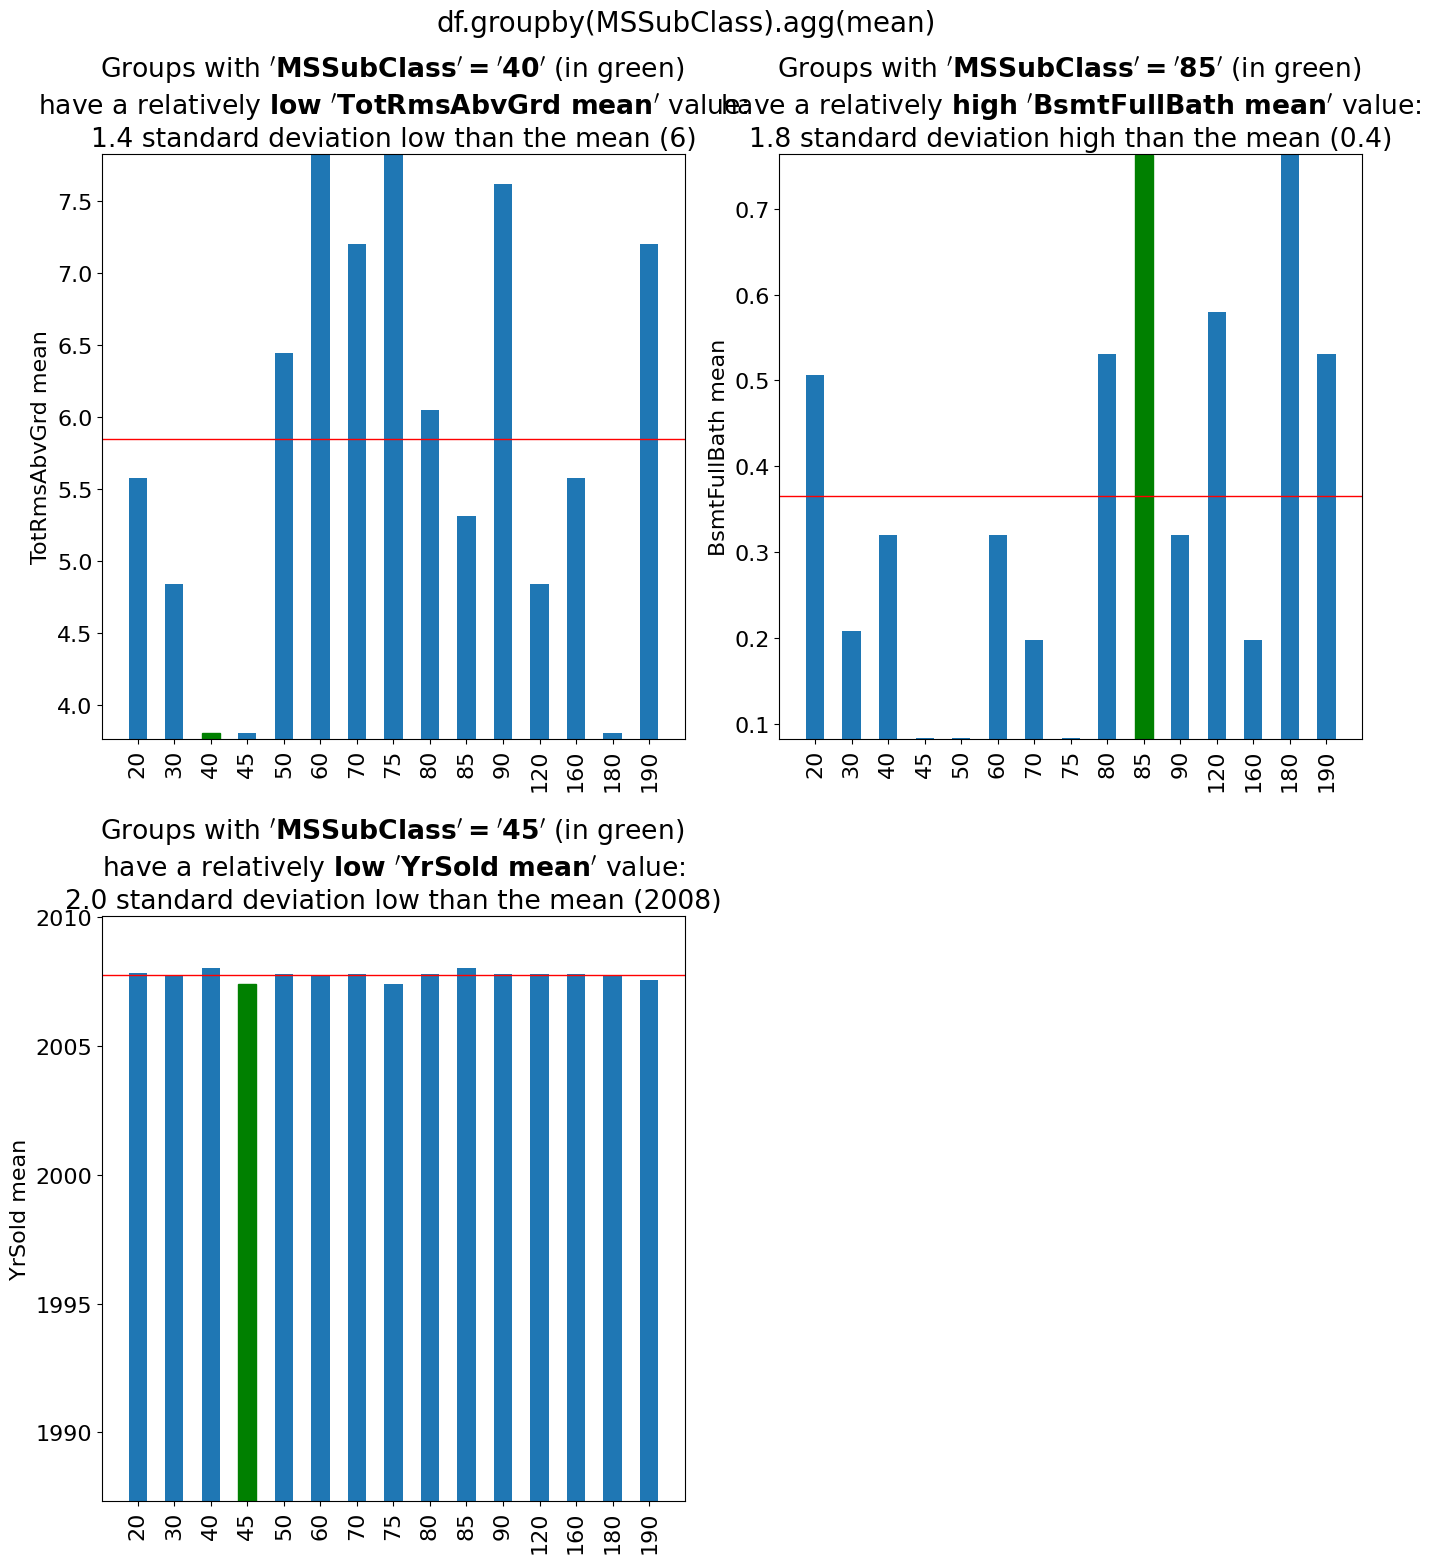

In [16]:
gb3.explain(top_k=3)

 supress warnings? 

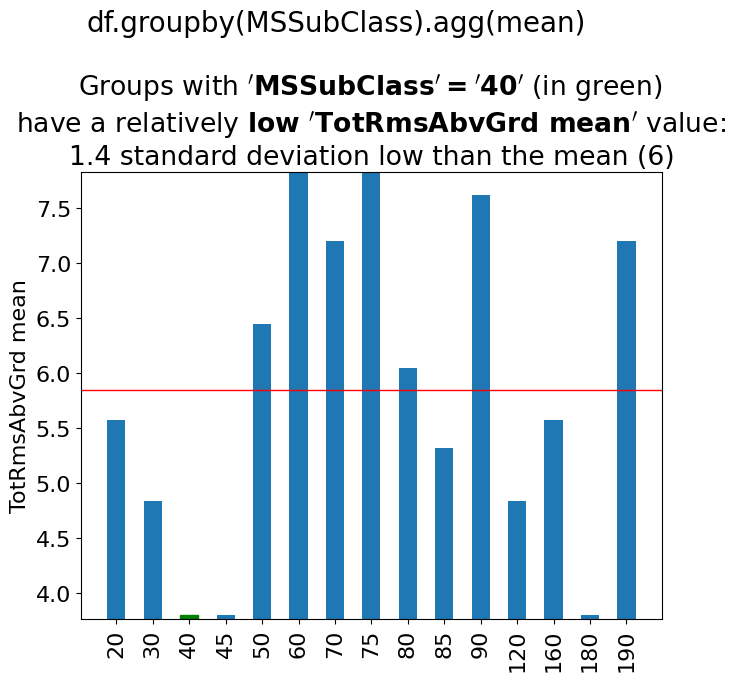

In [17]:
df.groupby('MSSubClass').agg('mean').explain()

error:

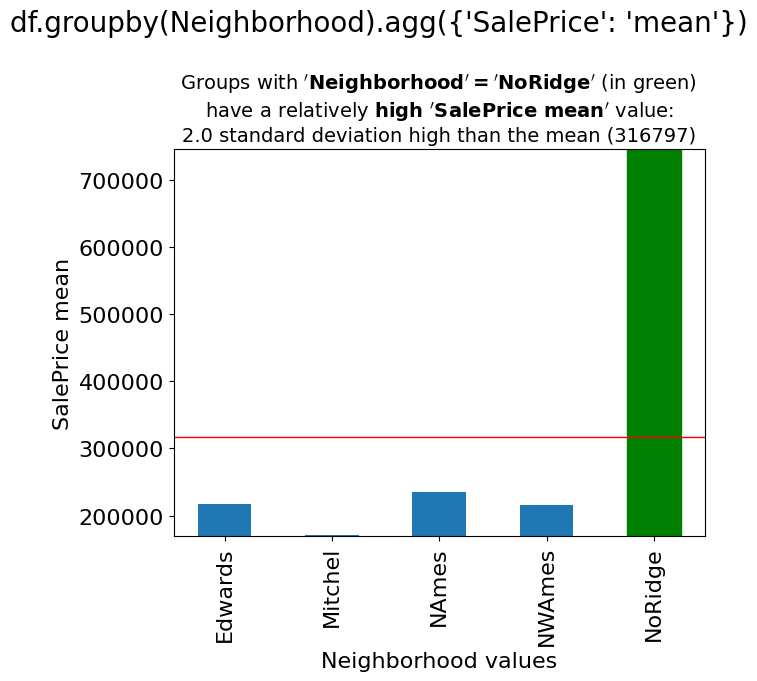

In [18]:
df.groupby('Neighborhood').agg({'SalePrice':'mean'}).explain()

Group by one to many

In [19]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### COMMENT: See that it makes a groupby on everything, not just the attribute 'neighborhood'

In [20]:
df.groupby('Neighborhood').mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,773.941176,114.117647,47.142857,3398.176471,7.176471,5.000000,2005.235294,2005.764706,45.588235,196.000000,...,147.294118,15.529412,0.000000,0.000000,8.470588,0.000000,0.000000,5.705882,2007.470588,194870.882353
Blueste,778.500000,160.000000,24.000000,1625.000000,6.000000,6.000000,1980.000000,1980.000000,0.000000,183.000000,...,155.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.500000,137500.000000
BrDale,719.187500,160.000000,21.562500,1801.000000,5.687500,5.437500,1971.437500,1973.625000,307.562500,250.437500,...,68.250000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.812500,2007.687500,104493.750000
BrkSide,734.724138,49.741379,57.509804,7360.413793,5.051724,6.137931,1931.431034,1968.586207,7.396552,195.741379,...,35.844828,25.344828,39.844828,2.482759,20.896552,0.000000,35.689655,6.206897,2007.672414,124834.051724
ClearCr,604.928571,52.500000,83.461538,30875.750000,5.892857,5.678571,1966.571429,1983.750000,84.571429,620.892857,...,188.821429,64.821429,32.535714,4.642857,34.928571,0.000000,32.142857,6.785714,2007.785714,212565.428571
CollgCr,726.840000,43.300000,71.682540,9619.146667,6.640000,5.240000,1997.886667,1999.140000,97.879195,456.586667,...,114.320000,51.720000,0.226667,2.593333,4.300000,0.000000,16.333333,6.140000,2007.806667,197965.773333
Crawfor,801.078431,58.235294,71.804878,11809.686275,6.274510,6.588235,1941.549020,1979.196078,82.740000,466.803922,...,52.568627,27.000000,46.176471,10.803922,30.176471,0.000000,49.019608,6.862745,2007.490196,210624.725490
Edwards,762.930000,56.800000,68.217391,10218.650000,5.080000,5.440000,1955.970000,1975.110000,50.470000,424.460000,...,70.770000,33.240000,26.380000,1.800000,15.250000,12.180000,16.000000,5.750000,2007.940000,128219.700000
Gilbert,749.151899,58.227848,79.877551,11379.151899,6.556962,5.126582,1998.253165,1998.822785,42.051282,214.025316,...,102.822785,42.632911,0.000000,10.974684,3.683544,0.000000,21.265823,6.594937,2007.556962,192854.506329
